In [1]:
#PACKAGES
import networkx as nx
import osmnx as ox
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import csv
import numpy as np
import pandas as pd
%matplotlib inline
ox.config(use_cache=True, log_console=True)
ox.__version__

'0.16.1'

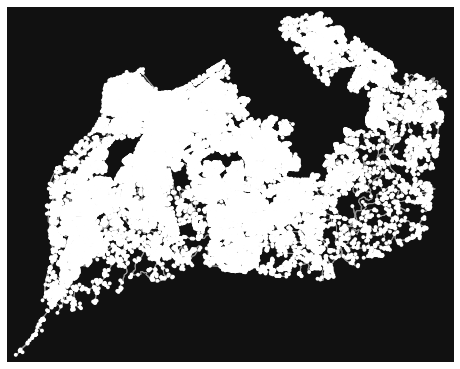

In [2]:
#IMPORT LOUISVILLE MAP
G = ox.graph_from_place('Louisville, Kentucky, USA', network_type='bike')
fig, ax = ox.plot_graph(G)

In [3]:
#MAKE LIST OF ALL NODES IN LOUISVILLE MAP
all_node_coor = [] 
for i in list(G.nodes):  #'y' = lat, 'x' = lon
    all_node_coor.append([G.nodes[i]['y'], G.nodes[i]['x']])
#print(all_node_coor[0:3])

In [10]:
#IMPORT DOCKLESS BIKE DATA
#ADD PANDAS, CREATE DATAFRAME
data = []
with open('dockless.csv','r') as file:
    reader = csv.reader(file)
    for row in reader:
        #print(row)
        data.append(row)


In [11]:
data_pd = pd.DataFrame(data)
data_pd.drop(columns=[0,1,2,3,4,5,6,11,12],inplace=True)
data_pd.columns = data_pd.iloc[0]
data_pd = data_pd.drop(index=0)
data_pd.head()

,StartLatitude,StartLongitude,EndLatitude,EndLongitude
1,38.253,-85.756,38.253,-85.755
2,38.203,-85.752,38.204,-85.751
3,38.259,-85.733,38.265,-85.739
4,38.217,-85.757,38.221,-85.763
5,38.215,-85.759,38.222,-85.764


In [20]:
#GET SAMPLE
data_sample_1 = data_pd.sample(10000)
data_sample_1 = data_sample_1.drop(data_sample_1.index[9999])
#data_sample_2 = data_pd.sample(10000)
#data_sample_3 = data_pd.sample(10000)
print(data_sample_1.head())


0      StartLatitude StartLongitude EndLatitude EndLongitude
421878        38.258        -85.761      38.258       -85.76
403540        38.256        -85.754      38.256      -85.744
494551        38.222        -85.763       38.22      -85.763
32932         38.252        -85.739      38.256      -85.753
199822        38.251        -85.761      38.255      -85.748


In [8]:
data1 = data_sample_1.values.tolist()
print(data1[0:20])

[['38.206', '-85.736', '38.208', '-85.734'], ['38.257', '-85.753', '38.256', '-85.754'], ['38.252', '-85.757', '38.252', '-85.757'], ['38.245', '-85.756', '38.246', '-85.764'], ['38.221', '-85.754', '38.204', '-85.758'], ['38.256', '-85.764', '38.256', '-85.764'], ['38.256', '-85.762', '38.249', '-85.754'], ['38.236', '-85.752', '38.254', '-85.733'], ['38.25', '-85.758', '38.246', '-85.758'], ['38.242', '-85.726', '38.239', '-85.724'], ['38.257', '-85.751', '38.268', '-85.779'], ['38.224', '-85.687', '38.23', '-85.702'], ['38.255', '-85.743', '38.252', '-85.754'], ['38.253', '-85.7', '38.261', '-85.696'], ['38.258', '-85.745', '38.258', '-85.745'], ['38.248', '-85.732', '38.257', '-85.731'], ['38.256', '-85.752', '38.253', '-85.754'], ['38.208', '-85.758', '38.216', '-85.755'], ['38.258', '-85.746', '38.26', '-85.743'], ['38.256', '-85.757', '38.256', '-85.757']]


In [9]:
#MAKE LISTS OF START AND END COORDINATES
data = data1
n = len(data)
start_coor = [] #[lat, lon]
end_coor = [] #[lat, lon]
for i in range(1,n):
    start_coor.append([float(data[i][0]), float(data[i][1])])
    end_coor.append([float(data[i][2]), float(data[i][3])])
print(start_coor[0], end_coor[0])
print(n)

[38.257, -85.753] [38.256, -85.754]
10000


In [10]:
#FIND CLOSEST NODES
import time
start = np.array(start_coor) #list of closest start nodes in Louisville graph
end = np.array(end_coor) #list of closest end nodes in Louisville graph
start_coor_long = start[:,-1:] #[lat,lon] coordinates
start_coor_lat = start[:,:-1] 
end_coor_long = end[:,-1:]
end_coor_lat = end[:,:-1]

file = open('closestnodes_sample1','w')
file.write('Sample 1 \n')
for i in range(len(start_coor_long)):
    s = ox.distance.get_nearest_nodes(G,start_coor_long.tolist()[i],start_coor_lat.tolist()[i], method = 'kdtree')[0]
    t = ox.distance.get_nearest_nodes(G,end_coor_long.tolist()[i],end_coor_lat.tolist()[i], method = 'kdtree')[0]
    file.write(str(s) + ',' + str(t) + '\n')
file.close()



In [12]:
#WRITE ID OF CLOSEST NODE PAIRS TO FILE
file = open('closestnodes','w')
for i in trip_ID_list:
    file.write(str(i[0]) + ',' + str(i[1]) + '\n')
file.close()


NameError: name 'trip_ID_list' is not defined

In [3]:
#WRITE EACH TRIP OF file TO TRIP LIST AS [startID, endID]
file1 = open('closestnodes_sample1','r')
tripIDstrings = file1.readlines()
file1.close()
#print(len(tripIDstrings))
print(tripIDstrings[0:2])

['Sample 1 \n', '2320225034,503783746\n']


In [5]:
#DATA CLEANUP & CONVERT TO INT
tripIDlist = []
for i in range(1, len(tripIDstrings)):
    x = tripIDstrings[i].strip().split(',')
    for i in range(2):
        x[i] = int(x[i])
    tripIDlist.append(x)
print(tripIDlist[0:2])

[[2320225034, 503783746], [7101042358, 7101042358]]


In [6]:
#SPLIT TRIP ID's INTO 2 LISTS
closest_start_id = []
closest_end_id = []
for i in tripIDlist:
    closest_start_id.append(i[0])
    closest_end_id.append(i[1])

In [21]:
data_sample_1.insert(4, 'Closest Start', closest_start_id[0:10000], True) 
data_sample_1.insert(5, 'Closest End', closest_end_id[0:10000], True) 
data_sample_1.head()

,StartLatitude,StartLongitude,EndLatitude,EndLongitude,Closest Start,Closest End
421878,38.258,-85.761,38.258,-85.76,2320225034,503783746
403540,38.256,-85.754,38.256,-85.744,7101042358,7101042358
494551,38.222,-85.763,38.22,-85.763,6888191491,7485712622
32932,38.252,-85.739,38.256,-85.753,164801416,1530457420
199822,38.251,-85.761,38.255,-85.748,3516325189,3516325189


In [22]:
#CREATE NEW GRAPH TO RETAIN SHORTEST PATHS OF TRIPS IN LOUISVILLE GRAPH
modified_G = nx.Graph() #Create new graph from edges satisfying shortest path of bike paths (not completed yet)
#lists of coordinates below were not used
#can be deleted...
closest_start_coor = [] #converted list of node ID's to coordinates
closest_end_coor = []
for i in closest_start_id:
    closest_start_coor.append([G.nodes[i]['x'], G.nodes[i]['y']])
for i in closest_end_id:
    closest_end_coor.append([G.nodes[i]['x'], G.nodes[i]['y']])

In [23]:
#ADD SHORTEST PATHS FOR EACH TRIP
paths = [] #shorest path taken of a trip using graph of Louisville
for i in range(len(closest_start_coor)):
    try:
        paths = nx.shortest_path(G,closest_start_id[i], closest_end_id[i])
    except:
        pass
    path_edges = list(zip(paths,paths[1:]))
    modified_G.add_edges_from(path_edges)

print(path_edges)
'''    
pathfile = open('sample1_paths','w')
for i in path_edges:
    pathfile.write(str(i))
pathfile.close()
'''

[(3603430358, 164998617), (164998617, 164998614), (164998614, 4612387719), (4612387719, 164671255), (164671255, 4618605418), (4618605418, 164666318), (164666318, 164766033), (164766033, 164883160), (164883160, 164615436), (164615436, 164615415), (164615415, 164793162), (164793162, 7228122504), (7228122504, 3449419425), (3449419425, 3449419427), (3449419427, 3449419428)]


"    \npathfile = open('sample1_paths','w')\nfor i in path_edges:\n    pathfile.write(str(i))\npathfile.close()\n"

{'y': 38.2483281, 'x': -85.7512356, 'osmid': 3560959801} {'y': 38.253008, 'x': -85.7521031, 'osmid': 3516419424}
9425


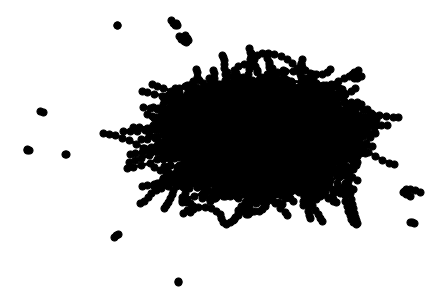

In [24]:
print(G.nodes[3560959801],G.nodes[3516419424])
#nx.shortest_path(G,3560959801,3516419424)
print(len(modified_G.edges()))
options = {
    'node_color': 'black',
    'node_size': 50,
    'width': 3,}
nx.draw(modified_G, **options)

In [25]:
print(len(modified_G.nodes()))

7796


In [27]:
edge_cent_dict = nx.algorithms.centrality.edge_betweenness_centrality(modified_G,7796,normalized=True)

np_edge_cent_val = list(edge_cent_dict.values())
#np_edge_cent_nozero = list(filter(lambda x: x>0.0001, np_edge_cent_val))

#print(np_edge_cent_nozero)
y = list(np.sort(np_edge_cent_val))




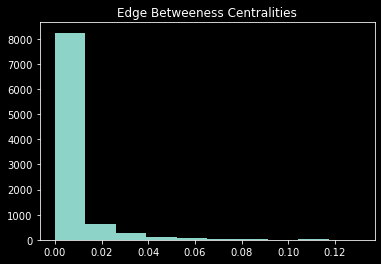

In [165]:
centrality = np_edge_cent_val
plt.hist(centrality)
plt.title('Edge Betweeness Centralities')
#plt.show()
plt.savefig("sample1-centrality-histogram.png")

In [28]:
#print(edge_cent_dict)
edge_cent_df = pd.DataFrame.from_dict(edge_cent_dict,orient='index')
print(edge_cent_df.head())
edge_cent_df.to_csv('sample1_edgecent.csv')

                                0
(2320225034, 165156395)  0.006502
(2320225034, 164893687)  0.001668
(2320225034, 503783936)  0.004800
(165156395, 164612975)   0.001643
(165156395, 165156403)   0.001302


In [43]:
from matplotlib import style
#style.available
style.use('dark_background')

9424


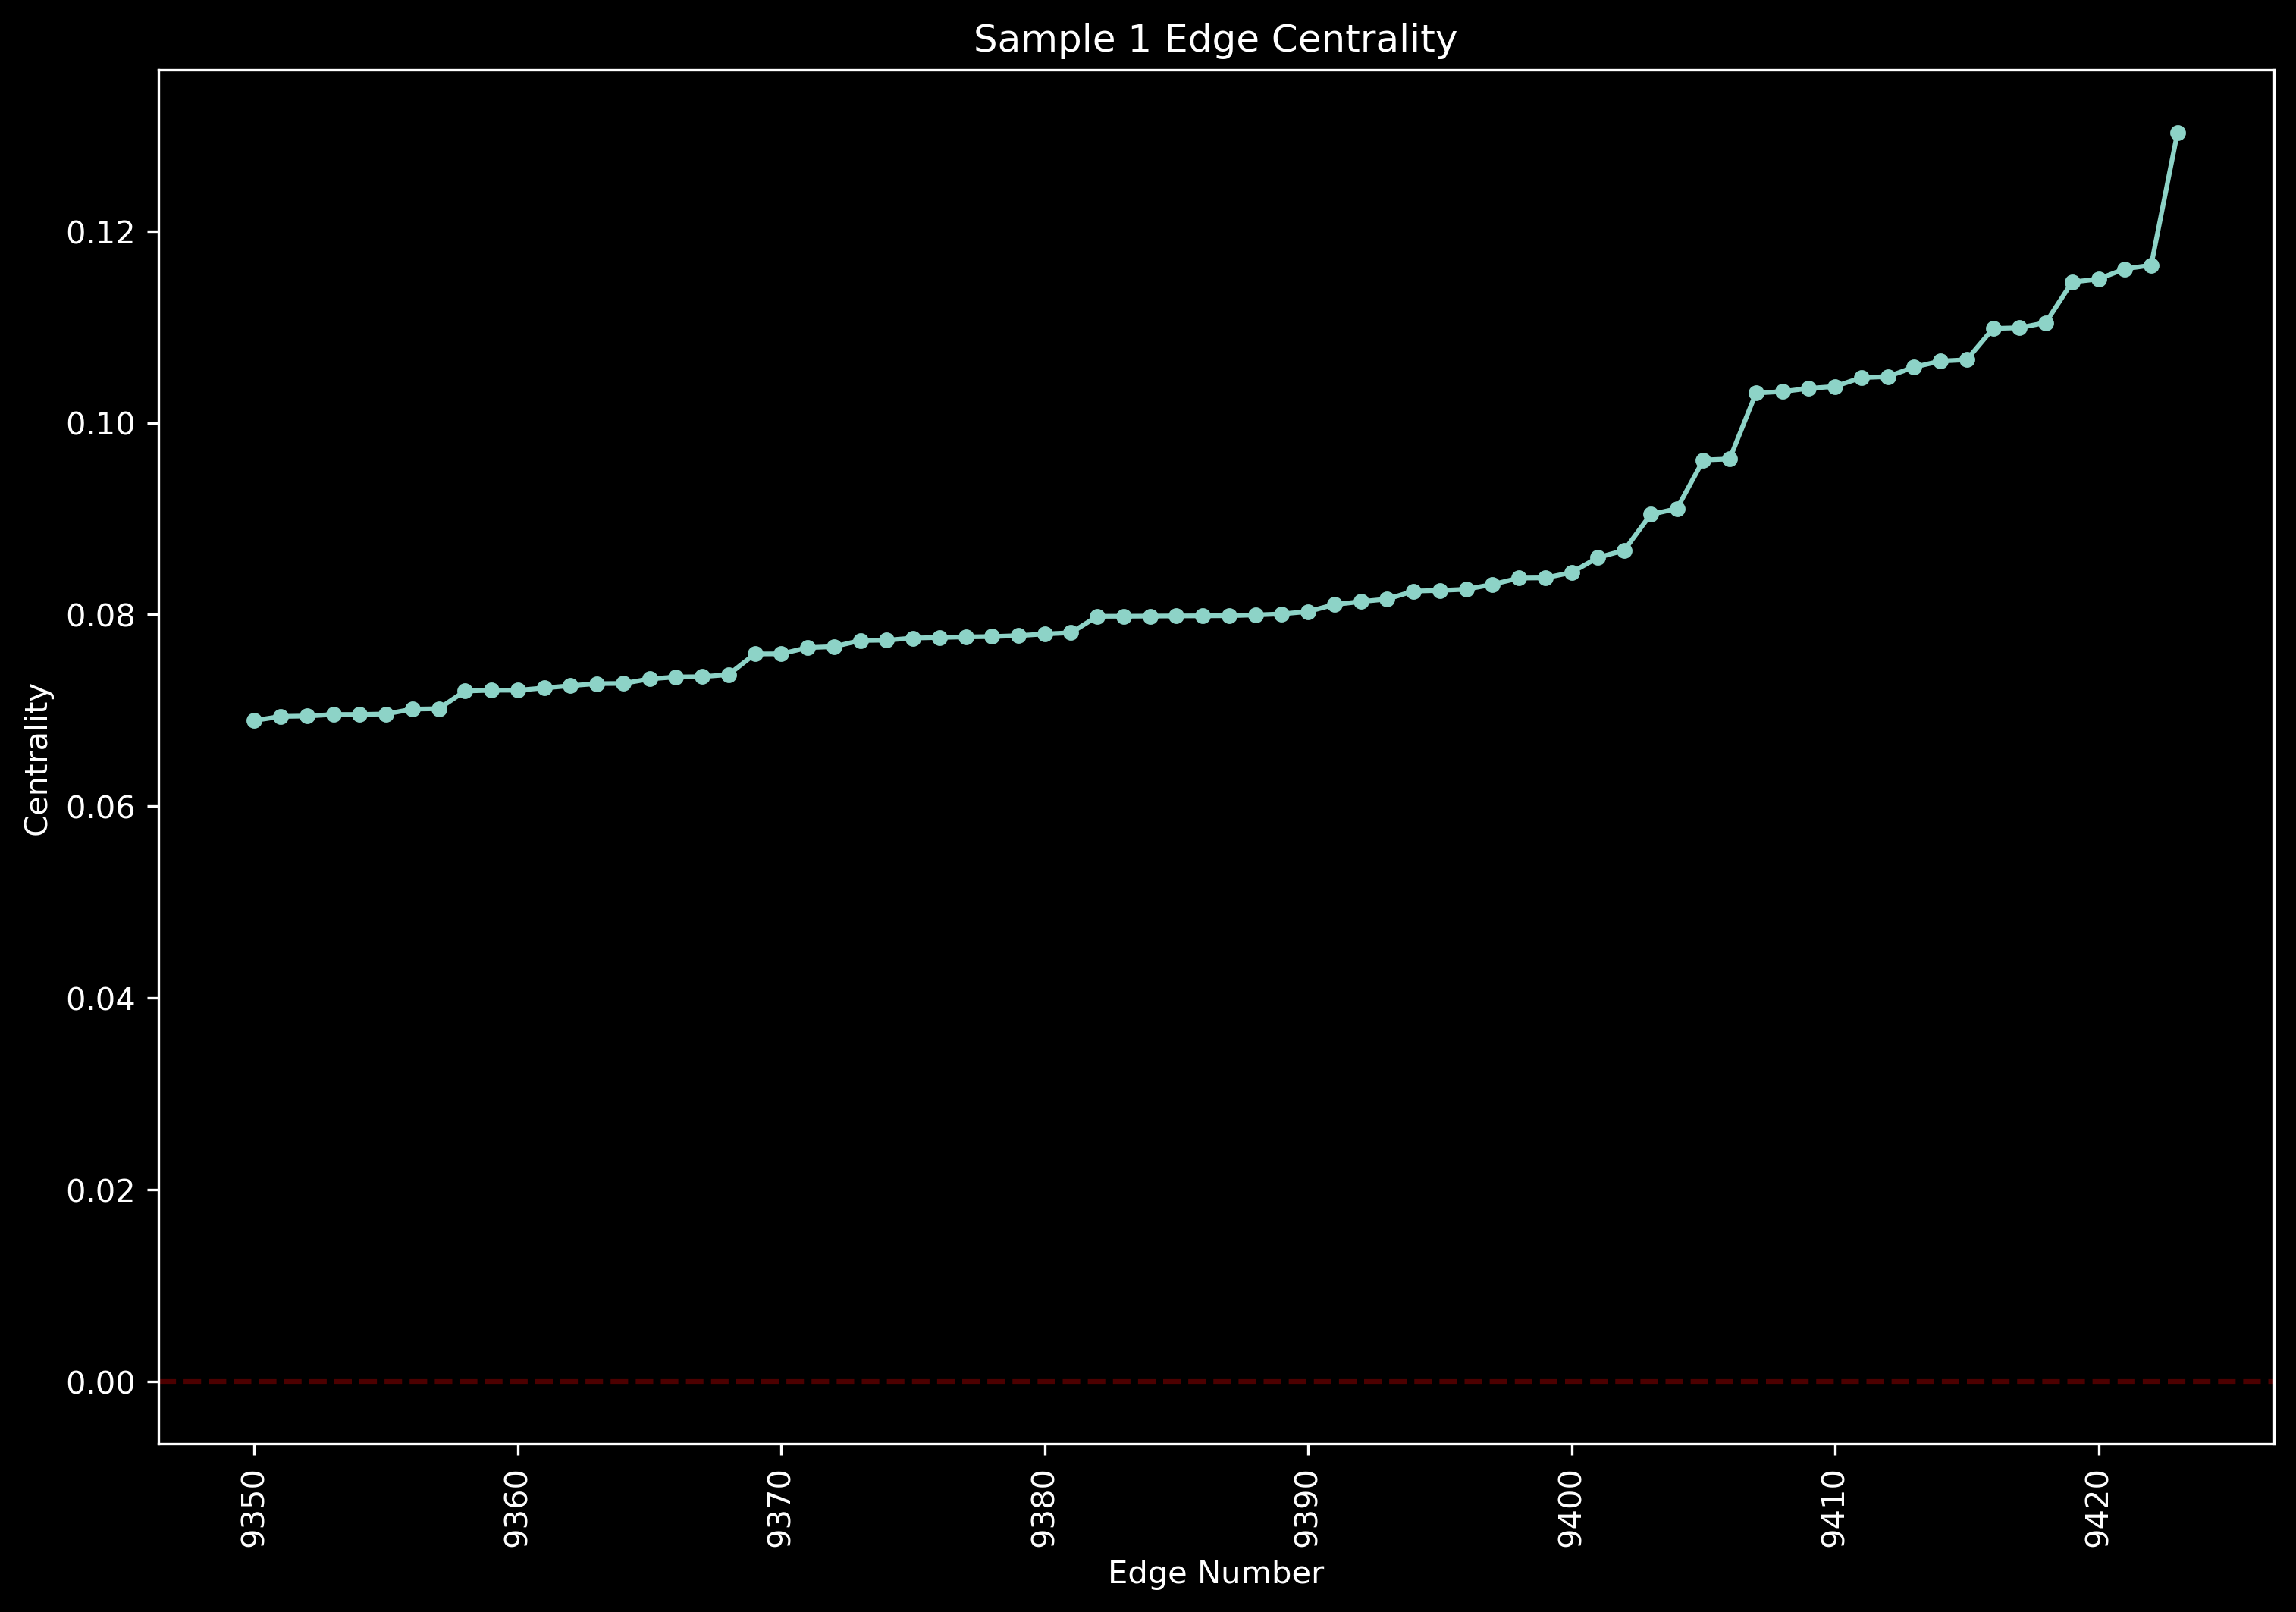

In [59]:
import matplotlib.pyplot as plt

x = list(range(len(y)))
#plt.plot(x,y)

fig=plt.figure(figsize=(12,8), dpi= 300)
plt.plot(x[9350:9424],y[9350:9424], '-o',markersize = 4)
#plt.plot(x,y,'-o', markersize=4)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.xticks(rotation=90)
plt.ylabel('Centrality')
plt.xlabel('Edge Number')
plt.title('Sample 1 Edge Centrality')
q25 = np.quantile(np_edge_cent_val, .25)
q50 = np.quantile(np_edge_cent_val, .50)
q75 = np.quantile(np_edge_cent_val, .75)
q25 = np.quantile(np_edge_cent_val, .25)
q90 = np.quantile(np_edge_cent_val, .90)
q95 = np.quantile(np_edge_cent_val, .95)
q98 = np.quantile(np_edge_cent_val, .98)
#plt.hlines([q25,q50,q75,q90,q95,q98],0,10000)
plt.savefig('sample1_ebet_9350.png')
print(x[-1])

In [56]:
n = len(np_edge_cent_val)
print(np.quantile(np_edge_cent_val, .25))
print(np.quantile(np_edge_cent_val, .50))
print(np.quantile(np_edge_cent_val, .75))
print(np.quantile(np_edge_cent_val, .90))
print(np.quantile(np_edge_cent_val, .95))
print(np.quantile(np_edge_cent_val, .98))

0.0005097267031562707
0.0014168399000010212
0.005313966447243727
0.016500620611410447
0.028767144143760005
0.04942702454515525


In [78]:
from networkx.algorithms import community
import itertools
central = max(edge_cent_dict, key=edge_cent_dict.get)

comp = community.centrality.girvan_newman(modified_G, central)
k = 2 
for communities in itertools.islice(comp, k):
  tuple(sorted(c) for c in communities)

TypeError: 'tuple' object is not callable

In [113]:
#Girven-Newman function

def edge_to_remove(g): 
    d1 = edge_cent_dict.copy()
    #d1 = nx.edge_betweenness_centrality(g) 
    list_of_tuples = list(d1.items()) 
      
    sorted(list_of_tuples, key = lambda x:x[1], reverse = True) 
      
    # Will return in the form (a,b) 
    return list_of_tuples[0][0] 
  
def girvan(g): 
    a = nx.connected_components(g) 
    lena = len(list(a)) 
    print (' The number of connected components are :', lena)

    node_counts = []
    for i in list(a):
        node_counts.append(len(i))
    print(node_counts)
    
    while (lena == 1): 
  
        # We need (a,b) instead of ((a,b)) 
        u, v = edge_to_remove(g) 
        g.remove_edge(u, v)  
          
        a = nx.connected_components(g)
        lena=len(list(a)) 
        print (' The number of connected components are ;', lena) 
    
    return a  #, node_counts

In [114]:
gir = girvan(modified_G)
#print(node_counts)
#for i in gir:
    #print(len(i.nodes()))

 The number of connected components are : 13
[]


In [61]:
H=modified_G.copy()

import operator

while nx.is_connected(H):
    #ebet=nx.edge_betweenness_centrality(H)
    ebet=edge_cent_dict 
    maxEdge=max(ebet, key=ebet.get)
    #print(maxEdge)
    if maxEdge in H.edges():
        H.remove_edge(maxEdge[0],maxEdge[1])
    else:
        H.remove_edge(maxEdge[1],maxEdge[0])


components=nx.connected_components(H)
x=[c for c in sorted(nx.connected_components(H), key=len, reverse=True)]

redNodes=[i for (i,d) in H.nodes(data=True) if i in x[0]]
blueNodes=[i for (i,d) in H.nodes(data=True) if i in x[1]]
nx.draw_networkx_nodes(G, pos, blueNodes, node_color='blue')
nx.draw_networkx_nodes(G, pos, redNodes, node_color='red')
nx.draw_networkx_edges(G, pos)

NameError: name 'pos' is not defined

In [131]:
from networkx.algorithms.community import greedy_modularity_communities
#G = nx.karate_club_graph()
c = list(greedy_modularity_communities(modified_G))
print('Number of communities:' + str(len(c)))
com_counts = []
for i in c:
    com_counts.append(len(i))
print(com_counts)
print(c[0:17])

Number of communities:67
[371, 338, 319, 315, 300, 278, 269, 245, 242, 239, 228, 224, 216, 207, 191, 177, 165, 164, 158, 155, 150, 147, 136, 129, 128, 120, 116, 111, 103, 102, 99, 97, 95, 93, 89, 87, 84, 83, 82, 81, 80, 80, 75, 71, 71, 64, 62, 59, 54, 53, 49, 48, 22, 13, 12, 8, 8, 7, 5, 5, 3, 3, 3, 2, 2, 2, 2]
[frozenset({4614957058, 4614957061, 4626655252, 4626655253, 2819006497, 8062509103, 8062509104, 8062509105, 794452024, 164841542, 164841547, 164841551, 4626126932, 4626126934, 7069229155, 7069229157, 164841603, 164694156, 164694165, 7111456926, 7111456927, 7111456932, 7111456933, 7111456935, 7111456936, 164694184, 7604490408, 7111456938, 164694188, 6902419629, 7111456942, 7111456941, 7111456943, 6902419633, 6902419634, 7111456947, 6902419635, 6902419636, 7111456949, 6902419637, 6902419638, 7111456954, 6902419644, 6902419648, 6902419649, 6902419650, 6902419651, 165163209, 3561601247, 3561601257, 3561601264, 165044481, 164872452, 3561601288, 164835602, 164835612, 164835615, 4612696

In [126]:
top25 = np.quantile(com_counts, .75)
s = 0
for i in com_counts:
    if i > top25:
        s += i
print(s)
print(sum(com_counts))

4324
7796


In [130]:
pos = nx.spring_layout(modified_G)
options = {"node_size": 50, "alpha": 0.8}
nx.draw_networkx_nodes(modified_G, pos, nodelist=c[0:2], node_color='g', **options)
nx.draw_networkx_nodes(modified_G, pos, nodelist=c[18:20], node_color='r', **options)

TypeError: draw_networkx_nodes() missing 1 required positional argument: 'pos'

In [148]:
#print(list(c[1]))
#print(c[2])
b = list(c[1])
type(b)
list(c[0])[0]

4614957058

In [182]:
green_zone_x = []
green_zone_y = []
red_zone_x = []
red_zone_y = []
for i in c:
    for j in list(i):
        if len(i) > top25:
            green_zone_x.append(G.nodes[j]['y'])
            green_zone_y.append(G.nodes[j]['x'])
        if len(i) < top25:
            red_zone_x.append(G.nodes[j]['y'])
            red_zone_y.append(G.nodes[j]['x'])
print(len(red_zone_x))
print(len(red_zone_y))

3472
3472


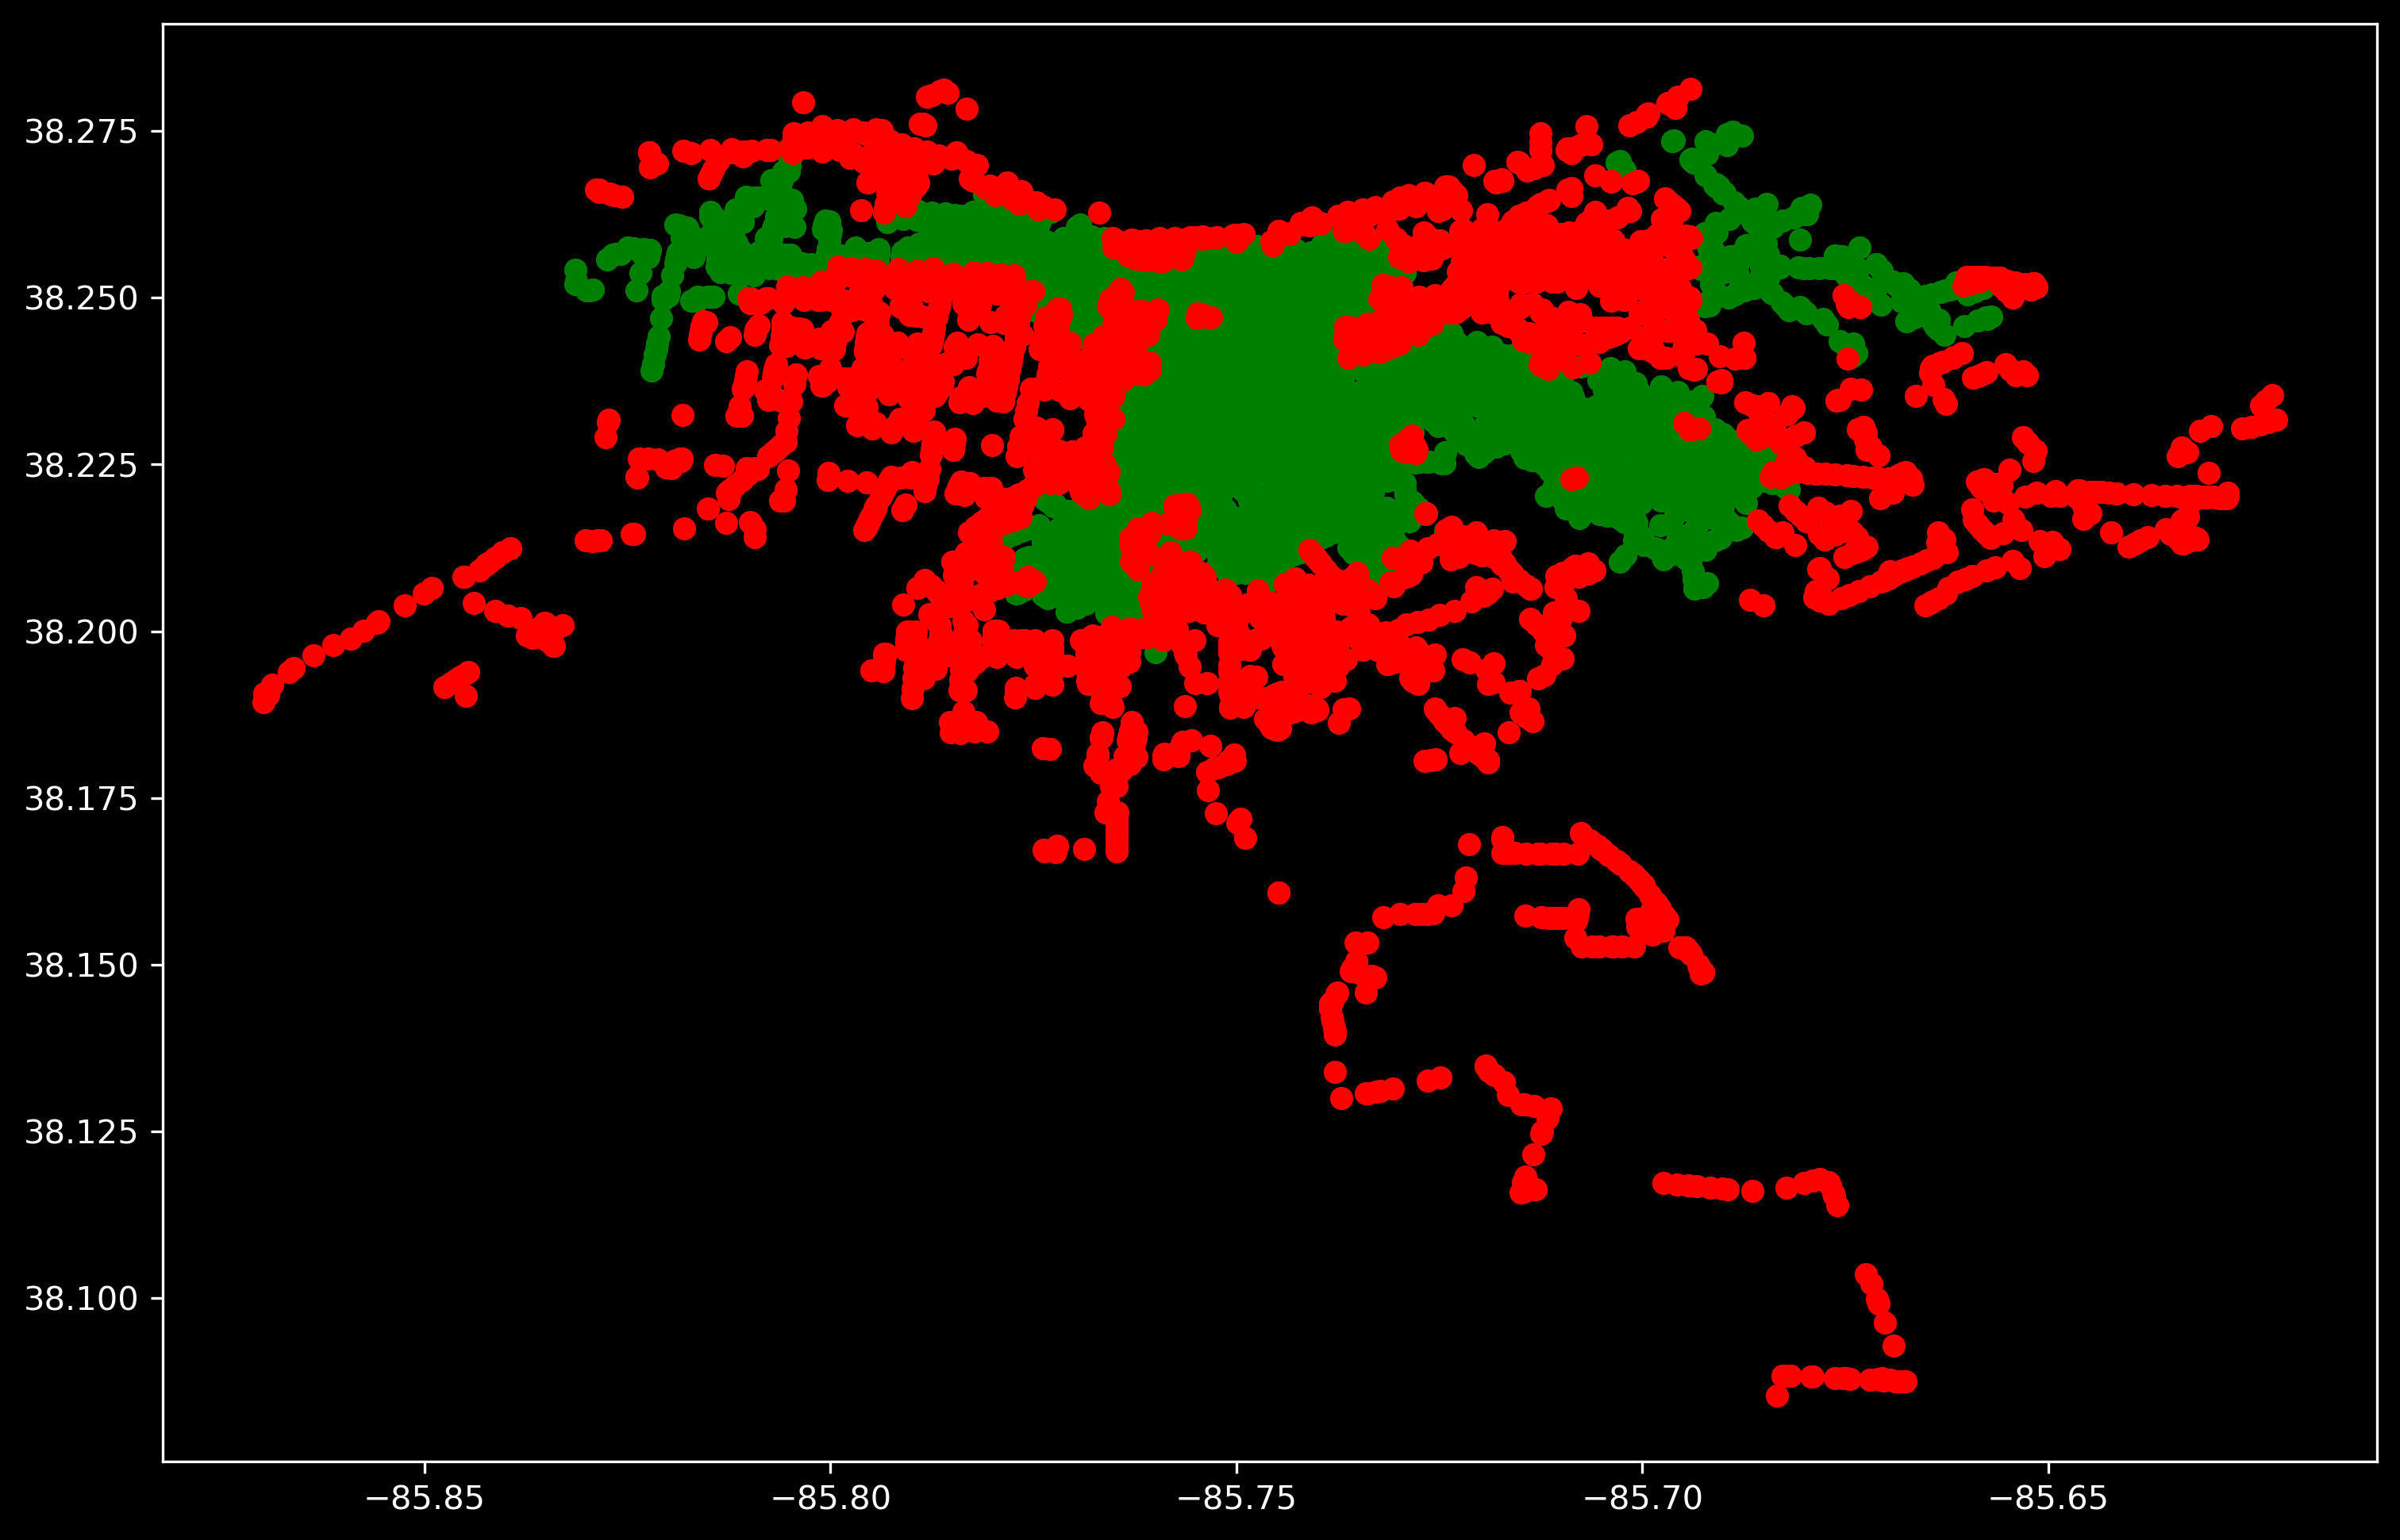

In [184]:
fig=plt.figure(figsize=(12,8), dpi= 300)
#plt.plot(green_zone_y, green_zone_x, color = 'g', marker='o', markersize = 4)
#plt.plot(red_zone_y, red_zone_x, color = 'r', marker='o', markersize = 4)
#plt.savefig("sample1_zones.png")
plt.scatter(green_zone_y, green_zone_x, color = 'g', marker='o')
plt.scatter(red_zone_y, red_zone_x, color = 'r', marker='o')
#plt.show()
plt.savefig("sample1_zones_noedges.png")

In [186]:
green_nodes =  []
red_nodes = []
for i in c:
    for j in list(i):
        if len(i) > top25:
            green_nodes.append(j)
all_nodes = list(G.nodes)
for i in all_nodes:
    if i not in green_nodes:
        red_nodes.append(i)

green_zone_x = []
green_zone_y = []
red_zone_x = []
red_zone_y = []

for i in green_nodes:
    green_zone_x.append(G.nodes[i]['y'])
    green_zone_y.append(G.nodes[i]['x'])    
for i in red_nodes:
    red_zone_x.append(G.nodes[i]['y'])
    red_zone_y.append(G.nodes[i]['x']) 



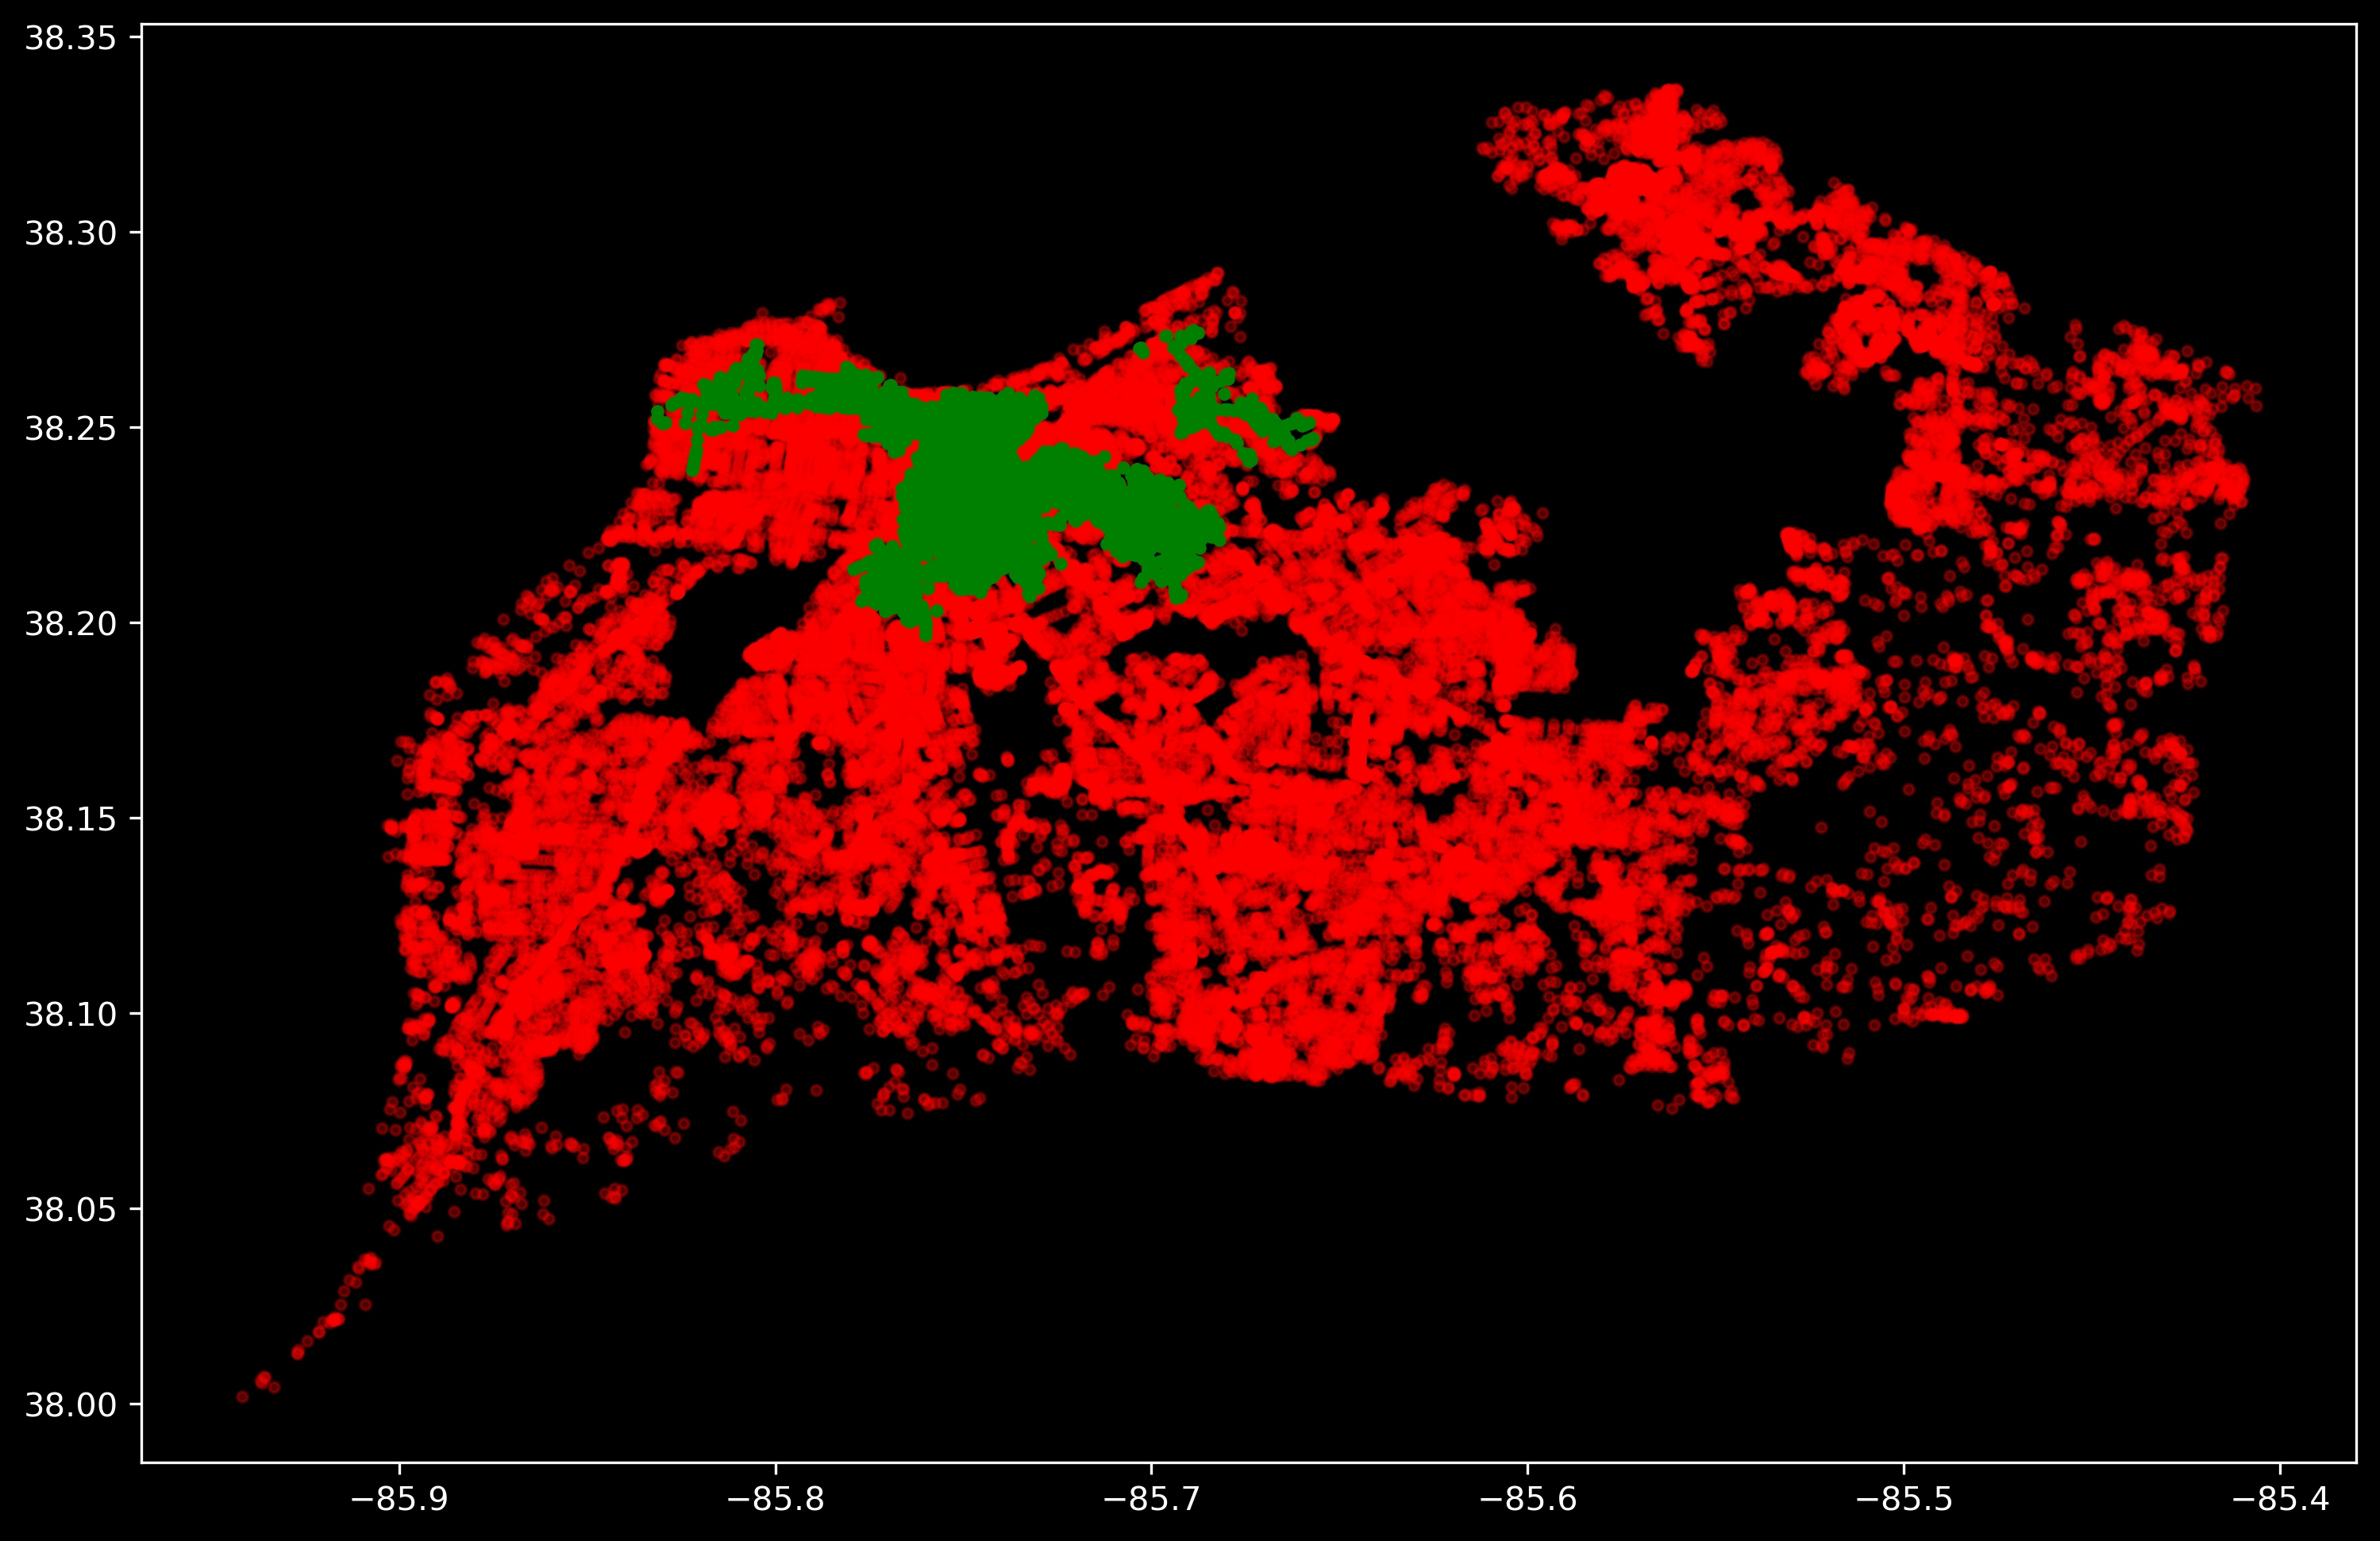

In [187]:
fig=plt.figure(figsize=(12,8), dpi= 300)
plt.scatter(red_zone_y, red_zone_x, color = 'r', marker='.', alpha = 0.3)
plt.scatter(green_zone_y, green_zone_x, color = 'g', marker='.')
plt.savefig('sample1_full_network_zones.png')
